<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRFSGmsjHqUe128W4IJAEwjK_E1HLIgPLQzLQ&usqp=CAU" />

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv('../input/email-dataset-to-check-spam-or-ok/emails.csv')

In [3]:
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df.shape

(5728, 2)

<h1>Drop Duplicate Mail </h1>

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(5695, 2)

In [8]:
df.isnull().sum()

text    0
spam    0
dtype: int64

<h1>Visual the how many email is spam and how many is ok </h1>

In [9]:
import seaborn as sns

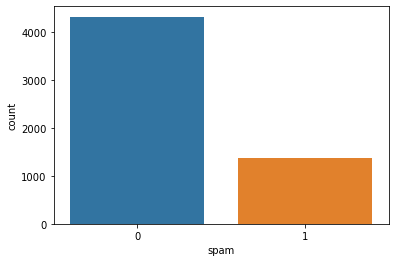

In [10]:
sns.countplot(df['spam'])

In [11]:
df.value_counts('spam')

spam
0    4327
1    1368
dtype: int64

<h1>Split Feature and Label </h1>

In [12]:
x=df.text.values

In [13]:
x

array(["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : y

In [14]:
y=df.spam.values

In [15]:
y

array([1, 1, 1, ..., 0, 0, 0])

<h1>Split the Dataset Size </h1>

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

<h1>Data Preprocessing </h1>

In [18]:
 from sklearn.feature_extraction.text import CountVectorizer


In [19]:
cv=CountVectorizer()

In [20]:
x_train=cv.fit_transform(xtrain)

In [21]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<h1> Ml Algo </h1>

In [22]:
from sklearn.naive_bayes import MultinomialNB


In [23]:
mn=MultinomialNB()

In [24]:
mn.fit(x_train,ytrain)

MultinomialNB()

In [25]:
##Now vectorize test part just using transform
x_test=cv.transform(xtest)

In [26]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
spam=mn.score(x_test,ytest)

In [28]:
print ("Spam Mail Detector Accuracy",spam.round(2))

Spam Mail Detector Accuracy 0.99


<h1> Check The Mail if it is Spam or Ok </h1>

In [29]:
mail=["Sir please tell us the exam date",'Hey you win iphone 10,plz login','hey when you come back to the home','You win 250$ dollar ']

In [30]:
check_mail=cv.transform(mail)

In [31]:
mn.predict(check_mail)

array([0, 1, 0, 1])